# Gemini Demo

## Installing Necessary packages

In [1]:
!pip install -q -U google-generativeai

## Importing Libraries

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('gemini')

genai.configure(api_key=GOOGLE_API_KEY)

## List of Models

In [4]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-pro
models/gemini-pro-vision


In [5]:
model = genai.GenerativeModel('gemini-pro')

## Models Response

In [6]:
%%time
response = model.generate_content("Who won the cricket world cup in 2023?")

CPU times: user 84.2 ms, sys: 7.81 ms, total: 92 ms
Wall time: 4.87 s


In [8]:
response.text

'As of my knowledge cutoff in May 2022, the 2023 Cricket World Cup has not yet taken place. The most recent Cricket World Cup was held in 2019, in which England defeated New Zealand to win their first ever World Cup title.\n\nSince I do not have access to real-time information, I cannot provide a result for the 2023 Cricket World Cup. To obtain the most up-to-date information, I recommend checking the official website of the International Cricket Council (ICC) or following reputable cricket media outlets.'

### Response in Markdown

In [9]:
to_markdown(response.text)

> As of my knowledge cutoff in May 2022, the 2023 Cricket World Cup has not yet taken place. The most recent Cricket World Cup was held in 2019, in which England defeated New Zealand to win their first ever World Cup title.
> 
> Since I do not have access to real-time information, I cannot provide a result for the 2023 Cricket World Cup. To obtain the most up-to-date information, I recommend checking the official website of the International Cricket Council (ICC) or following reputable cricket media outlets.

## Prompts feedback (does the output below to any of the blocking category or not)

In [10]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

## Multiple output generation

In [11]:
response.candidates

[content {
  parts {
    text: "As of my knowledge cutoff in May 2022, the 2023 Cricket World Cup has not yet taken place. The most recent Cricket World Cup was held in 2019, in which England defeated New Zealand to win their first ever World Cup title.\n\nSince I do not have access to real-time information, I cannot provide a result for the 2023 Cricket World Cup. To obtain the most up-to-date information, I recommend checking the official website of the International Cricket Council (ICC) or following reputable cricket media outlets."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

## Configuration


In [12]:
response = model.generate_content(
    'Tell me a story about a guy with no magic living in a magic world.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        # stop_sequences=['x'],
        max_output_tokens=1500,
        temperature=1.0)
)

In [13]:
response.candidates

[content {
  parts {
    text: "In a realms where enchantment ran through the very essence of reality, existed a unique individual named Ethan. Unlike the rest of Lenoria\'s inhabitants, Ethan possessed no magical abilities, which made him an anomaly in this fantastical world. Ethan had been found as a baby near the border of Lenoria, left by parents who were never found. He was taken in by a kind witch named Evelyn, who raised him as her own.\n\nFrom an early age, it was clear that Ethan was different from his peers. he showed no affinity for magic, despite Evelyn\'s encouragement and tutoring. While other children gleefully conjured flames from their fingertips and whispered spells to move objects, Ethan struggled with even the simplest incantations. At first, Ethan\'s lack of magic did not bother him. He had Evelyn, and he formed strong bonds with the village children, who accepted him regardless. However, as Ethan grew older, the world he lived in began to pose challenges.\n\nLenor

In [14]:
to_markdown(response.text)

> In a realms where enchantment ran through the very essence of reality, existed a unique individual named Ethan. Unlike the rest of Lenoria's inhabitants, Ethan possessed no magical abilities, which made him an anomaly in this fantastical world. Ethan had been found as a baby near the border of Lenoria, left by parents who were never found. He was taken in by a kind witch named Evelyn, who raised him as her own.
> 
> From an early age, it was clear that Ethan was different from his peers. he showed no affinity for magic, despite Evelyn's encouragement and tutoring. While other children gleefully conjured flames from their fingertips and whispered spells to move objects, Ethan struggled with even the simplest incantations. At first, Ethan's lack of magic did not bother him. He had Evelyn, and he formed strong bonds with the village children, who accepted him regardless. However, as Ethan grew older, the world he lived in began to pose challenges.
> 
> Lenoria was a place where magic was not just a talent, but also a necessity. From daily tasks to protecting against threats, spellcasting was an integral part of everyday life. Ethan found himself at a disadvantage in a world where he could not wield magic in any form. People began to question his place in the community, and some even whispered that he was cursed or brought bad luck. Ethan's heart ached as he realized that his difference were seen as a hinderance in Lenoria.
> 
> One day, a malevolent force threatened to overrun the realm. A dark wizard, Agramon, sought to enslave the people of Lenoria and extinguish the realm's magical energy. Fear and despair gripped the hearts of the villagers, and they turned to their most skilled wizards for defense. However, Agramon's power far surpassed theirs, and it seemed that all hope was lost.
> 
> In the midst of the chaos, Ethan had an epiphany. While he may not possess magic in the conventional sense, his upbringing among Lenoria's mystical being had provide him with an unparalleled understanding of magic in all its forms. He realized that his strength lay not in wielding magic, but in learning its nature and exploiting its weaknesses.
> 
> Ethan proposed a bold plan to the village leaders, which seemed reckless to some but ingenious to others. He would use his insight to find Agramon's vulnerability and aid the wizards in their battle. At first, they hesitated, but eventually, they agreed, seeing no other options.
> 
> With a combination of cunning and empathy, Ethan studied Agramon's patterns and discovered that his power was derived from stolen life force. He convinced the wizards to modify their spells, using his knowledge of magic to create targeted vulnerabilities in Agramon's defenses.
> 
> When the wizards faced the dark wizard in the final battle, they unleashed a barrage of the altered spells, guided by Ethan's strategic insights. To Agramon's surprise, his spell lost their effectiveness, and the wizards were able to subdue him.
> 
> Ethan's unique perspective on magic had saved the realm. He became a hero in Lednoria, not because of his magical abilities, but because of his wisdom, understanding, and courage. As Lenoria rebuilt in the aftermath of the war, Ethan became an advisor, helping the wizards harness magic responsibly and in ways that protected the realm without harming its natural balance.
> 
> In the land where magic was everything, it was a boy with no magic who proved to be the greatest sorcerer of all.

## Streaming Response

In [16]:
%%time
response = model.generate_content(
    "Who won the Cricket world cup in 2019 and how did they win?",
    stream=True
)

CPU times: user 172 ms, sys: 13.6 ms, total: 186 ms
Wall time: 10.5 s


In [20]:
for chunks in response:
  print(chunks.text)
  print("*"*100)

England won the Cricket World Cup in 2019, defeating New Zealand
****************************************************************************************************
 in a thrilling final at Lord's Cricket Ground in London. The match was tied after both teams scored 241 runs in their allotted 50
****************************************************************************************************
 overs, and England were declared the winners on boundary countback, having hit 26 boundaries to New Zealand's 17.

England's victory was their first Cricket World Cup title, and it was a culmination of years of hard work and dedication. The team had been building towards this moment for several
****************************************************************************************************
 years, and they were finally able to deliver when it mattered most.

England's victory was particularly poignant because it came on the same day as the anniversary of the terrorist attacks on 7/7 2005. T

## Chat


In [21]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [22]:
response = chat.send_message("Can you generate codes?")
to_markdown(response.text)

> Yes, I can generate codes in a variety of programming languages. Here are some examples:
> 
> **Python:**
> 
> ```python
> # Generate a random integer between 1 and 100
> import random
> print(random.randint(1, 100))
> 
> # Generate a random string of 10 lowercase letters
> import string
> print(''.join(random.choices(string.ascii_lowercase, k=10)))
> 
> # Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
> import secrets
> print(''.join(secrets.choice(string.ascii_letters + string.digits + string.punctuation) for i in range(12)))
> ```
> 
> **C++:**
> 
> ```c++
> #include <iostream>
> #include <random>
> 
> using namespace std;
> 
> int main() {
>   // Generate a random integer between 1 and 100
>   random_device rd;
>   mt19937 gen(rd());
>   uniform_int_distribution<int> dist(1, 100);
>   cout << dist(gen) << endl;
> 
>   // Generate a random string of 10 lowercase letters
>   string chars = "abcdefghijklmnopqrstuvwxyz";
>   string password(10, 0);
>   for (int i = 0; i < 10; i++) {
>     password[i] = chars[rand() % 26];
>   }
>   cout << password << endl;
> 
>   // Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
>   string chars2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()";
>   string password2(12, 0);
>   for (int i = 0; i < 12; i++) {
>     password2[i] = chars2[rand() % 62];
>   }
>   cout << password2 << endl;
> 
>   return 0;
> }
> ```
> 
> **Java:**
> 
> ```java
> import java.util.Random;
> import java.util.stream.IntStream;
> 
> public class CodeGenerator {
> 
>   public static void main(String[] args) {
>     // Generate a random integer between 1 and 100
>     System.out.println(new Random().nextInt(100) + 1);
> 
>     // Generate a random string of 10 lowercase letters
>     System.out.println(IntStream.range(0, 10)
>         .mapToObj(i -> (char) (97 + (int) (Math.random() * 26)))
>         .collect(StringBuilder::new, StringBuilder::append, StringBuilder::append)
>         .toString());
> 
>     // Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
>     System.out.println(IntStream.range(0, 12)
>         .mapToObj(i -> {
>           int type = (int) (Math.random() * 4);
>           switch (type) {
>             case 0:
>               return (char) (65 + (int) (Math.random() * 26));
>             case 1:
>               return (char) (97 + (int) (Math.random() * 26));
>             case 2:
>               return (char) (48 + (int) (Math.random() * 10));
>             case 3:
>               return (char) (33 + (int) (Math.random() * 15));
>             default:
>               return ' ';
>           }
>         })
>         .collect(StringBuilder::new, StringBuilder::append, StringBuilder::append)
>         .toString());
>   }
> }
> ```
> 
> I can also generate codes in other programming languages, such as JavaScript, PHP, Ruby, and Go. Just let me know what language you need the code in, and I'll be happy to help.
> 
> Please note that the codes I generate are for educational purposes only. You should not use them for any commercial or production purposes without first testing them thoroughly.

In [23]:
chat.history

[parts {
   text: "Can you generate codes?"
 }
 role: "user",
 parts {
   text: "Yes, I can generate codes in a variety of programming languages. Here are some examples:\n\n**Python:**\n\n```python\n# Generate a random integer between 1 and 100\nimport random\nprint(random.randint(1, 100))\n\n# Generate a random string of 10 lowercase letters\nimport string\nprint(\'\'.join(random.choices(string.ascii_lowercase, k=10)))\n\n# Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters\nimport secrets\nprint(\'\'.join(secrets.choice(string.ascii_letters + string.digits + string.punctuation) for i in range(12)))\n```\n\n**C++:**\n\n```c++\n#include <iostream>\n#include <random>\n\nusing namespace std;\n\nint main() {\n  // Generate a random integer between 1 and 100\n  random_device rd;\n  mt19937 gen(rd());\n  uniform_int_distribution<int> dist(1, 100);\n  cout << dist(gen) << endl;\n\n  // Generate a random string of 10 low

In [24]:
response = chat.send_message("Then generate a code for Binary Search Tree?", stream=True)

for chunk in response:
  print(chunk.text)
  print("*" * 100)

Here is a code for a binary search tree in Python:

```python

****************************************************************************************************
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right
****************************************************************************************************
 = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, data):
        new_node = Node(data)
        if self.root is None:
            self.root = new_node
        else:

****************************************************************************************************
            self._insert(new_node, self.root)

    def _insert(self, new_node, current_node):
        if new_node.data < current_node.data:
            if current_node.left is None:
                current_node.left = new_node
            else:
                self._insert(new_node, current_node.left)
 

In [25]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: Can you generate codes?

> **model**: Yes, I can generate codes in a variety of programming languages. Here are some examples:
> 
> **Python:**
> 
> ```python
> # Generate a random integer between 1 and 100
> import random
> print(random.randint(1, 100))
> 
> # Generate a random string of 10 lowercase letters
> import string
> print(''.join(random.choices(string.ascii_lowercase, k=10)))
> 
> # Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
> import secrets
> print(''.join(secrets.choice(string.ascii_letters + string.digits + string.punctuation) for i in range(12)))
> ```
> 
> **C++:**
> 
> ```c++
> #include <iostream>
> #include <random>
> 
> using namespace std;
> 
> int main() {
>   // Generate a random integer between 1 and 100
>   random_device rd;
>   mt19937 gen(rd());
>   uniform_int_distribution<int> dist(1, 100);
>   cout << dist(gen) << endl;
> 
>   // Generate a random string of 10 lowercase letters
>   string chars = "abcdefghijklmnopqrstuvwxyz";
>   string password(10, 0);
>   for (int i = 0; i < 10; i++) {
>     password[i] = chars[rand() % 26];
>   }
>   cout << password << endl;
> 
>   // Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
>   string chars2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()";
>   string password2(12, 0);
>   for (int i = 0; i < 12; i++) {
>     password2[i] = chars2[rand() % 62];
>   }
>   cout << password2 << endl;
> 
>   return 0;
> }
> ```
> 
> **Java:**
> 
> ```java
> import java.util.Random;
> import java.util.stream.IntStream;
> 
> public class CodeGenerator {
> 
>   public static void main(String[] args) {
>     // Generate a random integer between 1 and 100
>     System.out.println(new Random().nextInt(100) + 1);
> 
>     // Generate a random string of 10 lowercase letters
>     System.out.println(IntStream.range(0, 10)
>         .mapToObj(i -> (char) (97 + (int) (Math.random() * 26)))
>         .collect(StringBuilder::new, StringBuilder::append, StringBuilder::append)
>         .toString());
> 
>     // Generate a random password of 12 characters, including uppercase letters, lowercase letters, digits, and special characters
>     System.out.println(IntStream.range(0, 12)
>         .mapToObj(i -> {
>           int type = (int) (Math.random() * 4);
>           switch (type) {
>             case 0:
>               return (char) (65 + (int) (Math.random() * 26));
>             case 1:
>               return (char) (97 + (int) (Math.random() * 26));
>             case 2:
>               return (char) (48 + (int) (Math.random() * 10));
>             case 3:
>               return (char) (33 + (int) (Math.random() * 15));
>             default:
>               return ' ';
>           }
>         })
>         .collect(StringBuilder::new, StringBuilder::append, StringBuilder::append)
>         .toString());
>   }
> }
> ```
> 
> I can also generate codes in other programming languages, such as JavaScript, PHP, Ruby, and Go. Just let me know what language you need the code in, and I'll be happy to help.
> 
> Please note that the codes I generate are for educational purposes only. You should not use them for any commercial or production purposes without first testing them thoroughly.

> **user**: Then generate a code for Binary Search Tree?

> **model**: Here is a code for a binary search tree in Python:
> 
> ```python
> class Node:
>     def __init__(self, data):
>         self.data = data
>         self.left = None
>         self.right = None
> 
> class BinarySearchTree:
>     def __init__(self):
>         self.root = None
> 
>     def insert(self, data):
>         new_node = Node(data)
>         if self.root is None:
>             self.root = new_node
>         else:
>             self._insert(new_node, self.root)
> 
>     def _insert(self, new_node, current_node):
>         if new_node.data < current_node.data:
>             if current_node.left is None:
>                 current_node.left = new_node
>             else:
>                 self._insert(new_node, current_node.left)
>         else:
>             if current_node.right is None:
>                 current_node.right = new_node
>             else:
>                 self._insert(new_node, current_node.right)
> 
>     def search(self, data):
>         return self._search(data, self.root)
> 
>     def _search(self, data, current_node):
>         if current_node is None:
>             return False
>         if current_node.data == data:
>             return True
>         if data < current_node.data:
>             return self._search(data, current_node.left)
>         else:
>             return self._search(data, current_node.right)
> 
>     def delete(self, data):
>         self.root = self._delete(data, self.root)
> 
>     def _delete(self, data, current_node):
>         if current_node is None:
>             return None
>         if data < current_node.data:
>             current_node.left = self._delete(data, current_node.left)
>         elif data > current_node.data:
>             current_node.right = self._delete(data, current_node.right)
>         else:
>             if current_node.left is None:
>                 return current_node.right
>             elif current_node.right is None:
>                 return current_node.left
>             else:
>                 successor = self._get_successor(current_node.right)
>                 current_node.data = successor.data
>                 current_node.right = self._delete(successor.data, current_node.right)
>         return current_node
> 
>     def _get_successor(self, current_node):
>         while current_node.left is not None:
>             current_node = current_node.left
>         return current_node
> 
>     def inorder_traversal(self):
>         self._inorder_traversal(self.root)
> 
>     def _inorder_traversal(self, current_node):
>         if current_node is None:
>             return
>         self._inorder_traversal(current_node.left)
>         print(current_node.data)
>         self._inorder_traversal(current_node.right)
> 
>     def preorder_traversal(self):
>         self._preorder_traversal(self.root)
> 
>     def _preorder_traversal(self, current_node):
>         if current_node is None:
>             return
>         print(current_node.data)
>         self._preorder_traversal(current_node.left)
>         self._preorder_traversal(current_node.right)
> 
>     def postorder_traversal(self):
>         self._postorder_traversal(self.root)
> 
>     def _postorder_traversal(self, current_node):
>         if current_node is None:
>             return
>         self._postorder_traversal(current_node.left)
>         self._postorder_traversal(current_node.right)
>         print(current_node.data)
> ```
> 
> This code implements a binary search tree with the following methods:
> 
> * `insert`: Inserts a new node into the tree.
> * `search`: Searches for a node in the tree.
> * `delete`: Deletes a node from the tree.
> * `inorder_traversal`: Performs an inorder traversal of the tree.
> * `preorder_traversal`: Performs a preorder traversal of the tree.
> * `postorder_traversal`: Performs a postorder traversal of the tree.
> 
> You can use this code to create and manipulate binary search trees in your Python programs.

## Embeddings

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

In [26]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [27]:
len(result['embedding'])

768

In [28]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


## Advance Usecases

### Safety

In [29]:
model = genai.GenerativeModel('gemini-pro')

In [34]:
response = model.generate_content('How to hack LLMsr?')
to_markdown(response.text)

> 1. **Adversarial Examples:**
>    - Craft specially designed inputs (adversarial examples) to cause the model to make incorrect predictions.
>    - These inputs are carefully crafted to exploit the model's weaknesses and induce it to output the desired result.
>    - Adversarial examples can be generated using various techniques such as gradient-based methods, genetic algorithms, or fuzzing.
> 
> 2. **Model Extraction:**
>    - Reverse-engineer the model's architecture and parameters by extracting them from the code or binary.
>    - This involves analyzing the code, identifying the model's structure, and extracting the weight values.
>    - Model extraction can be achieved through techniques like static analysis, dynamic analysis, or reverse engineering tools.
> 
> 3. **Data Poisoning:**
>    - Manipulate the training data used to train the model by injecting malicious or incorrect data.
>    - Data poisoning aims to influence the model's learning process and cause it to make specific predictions.
>    - Techniques for data poisoning include adding crafted data points, modifying existing data, or removing specific data instances.
> 
> 4. **Prompt Engineering:**
>    - Craft malicious or carefully crafted prompts to manipulate the model's responses.
>    - Prompt engineering involves designing inputs that exploit the model's limitations or biases to generate desired outputs.
>    - Techniques for prompt engineering include using specific keywords, phrases, or sentence structures to steer the model's responses.
> 
> 5. **Model Inversion:**
>    - Reverse the model's predictions to infer the training data or sensitive information used to train the model.
>    - Model inversion aims to recover the original data used for training by analyzing the model's outputs.
>    - Techniques for model inversion include gradient-based methods, optimization algorithms, or membership inference attacks.
> 
> 6. **Black-Box Attacks:**
>    - Attack the model without having direct access to its internals or training data (black-box setting).
>    - Black-box attacks are typically conducted by sending carefully crafted inputs to the model and observing its outputs.
>    - Techniques for black-box attacks include query-based attacks, transfer-based attacks, or model-agnostic attacks.
> 
> 7. **Overfitting and Underfitting:**
>    - Train the model on insufficient or biased data, leading to overfitting or underfitting.
>    - Overfitting occurs when the model learns the training data too well and starts making poor predictions on new data.
>    - Underfitting occurs when the model fails to learn the underlying patterns in the training data and makes poor predictions on both training and new data.
> 
> 8. **Exploiting Model Bias:**
>    - Identify and exploit biases or vulnerabilities in the model's training data or design.
>    - Model bias can arise from factors such as data imbalances, algorithmic choices, or societal biases.
>    - By understanding and exploiting these biases, attackers can manipulate the model's predictions.
> 
> 9. **Hybrid Attacks:**
>    - Combine multiple hacking techniques to create more sophisticated and effective attacks.
>    - Hybrid attacks leverage the strengths of different approaches to bypass model defenses and achieve the desired outcome.
>    - For example, combining adversarial examples with data poisoning can increase the success rate of the attack.
> 
> 10. **Social Engineering:**
>    - Use social engineering techniques to manipulate users into providing sensitive information that can be used to attack the model.
>    - Social engineering attacks often rely on human vulnerabilities, such as gullibility or trust, to obtain the necessary information.
>    - Attackers may use phishing emails, phone calls, or other methods to trick users into revealing confidential data.

In [32]:
response = model.generate_content('How to hack LLMs?')
to_markdown(response.text)

ValueError: ignored

In [33]:
response.prompt_feedback

block_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: MEDIUM
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [35]:

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

In [36]:
response = model.generate_content('How to hack LLMs?', safety_settings=safety_settings)
to_markdown(response.text)

> 1. **Prompt Engineering**: LLMs are trained on massive datasets of text and code, and their responses are heavily influenced by the prompts they receive. Attackers can craft malicious prompts that are specifically designed to exploit the weaknesses of the LLM, leading it to generate harmful or incorrect responses. For example, an attacker might create a prompt that asks the LLM to write a convincing argument for a dangerous conspiracy theory, or to generate code that contains a security vulnerability.
> 2. **Adversarial Examples**: Adversarial examples are carefully crafted inputs that are designed to cause machine learning models to make incorrect predictions. In the context of LLMs, attackers can create adversarial examples that are designed to trick the model into generating specific outputs, such as harmful or biased text, or code that contains malicious behavior.
> 3. **Data Poisoning**: Data poisoning attacks involve manipulating the training data of the LLM in order to influence its behavior. Attackers can inject malicious data into the training set, such as text or code that contains harmful or biased content. This can cause the LLM to learn incorrect associations or patterns, leading it to generate harmful or incorrect responses when deployed.
> 4. **Model Extraction**: Model extraction attacks aim to extract the parameters or weights of the LLM, which can be used to reverse engineer the model or to create a cloned model that exhibits similar behavior. Attackers can use various techniques, such as gradient-based methods or black-box attacks, to extract the model parameters without having direct access to the model's internals.
> 5. **Black-Box Attacks**: Black-box attacks are particularly challenging as they do not require direct access to the internal workings of the LLM. Attackers can use techniques such as query-based attacks, where they send carefully crafted queries to the LLM and analyze its responses to infer information about the model's parameters or behavior. Gradient-free optimization methods can also be used to find adversarial examples or other manipulations that can fool the LLM.

## Generate Text from Image

In [48]:
!curl -o image.jpg https://4.bp.blogspot.com/-4gowMCzjaEg/WtpiqAvwmcI/AAAAAAAAFm8/h3pn7jMCT-wNM4mYmmFxpQWv5OS7maCnwCLcBGAs/s1600/maxresdefault%2B%25283%2529.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88236  100 88236    0     0   339k      0 --:--:-- --:--:-- --:--:--  339k


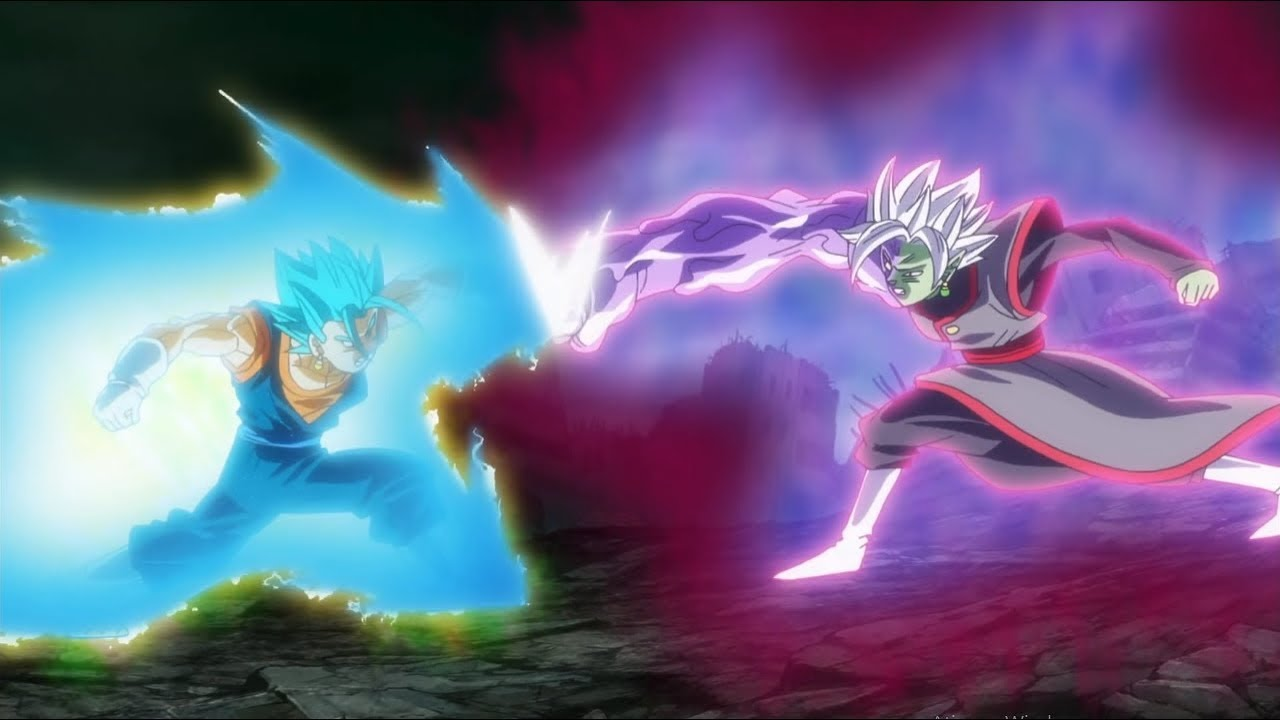

In [49]:
import PIL.Image

img = PIL.Image.open('/content/image.jpg')
img

In [39]:
model = genai.GenerativeModel('gemini-pro-vision')


In [50]:

response = model.generate_content(img)

to_markdown(response.text)

>  This is a fight scene from the anime series Dragon Ball Super. The two characters fighting are Vegito (left) and Fused Zamasu (right). Vegito is the fusion of Vegeta and Goku, two of the main characters of the series. Fused Zamasu is the fusion of Zamasu, a Supreme Kai, and Black Goku, an evil version of Goku.

In [51]:
response = model.generate_content(["""Write a short, engaging blog post based on this picture.
It should include a description of the fight in the photo and talk about storyline.""", img],)
response.resolve()

In [52]:
to_markdown(response.text)

>  In this epic battle between Goku Black and Vegeta, the two warriors are evenly matched. Goku Black has the advantage of being able to use the Super Saiyan Rosé transformation, while Vegeta has the advantage of being more experienced. The battle is fierce, and it is unclear who will win.
> 
> The fight between Goku Black and Vegeta is one of the most anticipated fights in the Dragon Ball Super series. The two warriors are evenly matched, and the battle is sure to be intense. Fans of the series will not want to miss this fight!